## Load Data

In [ ]:
!pip install datatable

import datatable as dt

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
%%time

data = dt.fread('/content/drive/MyDrive/Colab Notebooks/riiid/riiid-test-answer-prediction.zip (Unzipped Files)/train.csv')
print("Train size:", data.shape)

KeyboardInterrupt: ignored

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/riiid/riiid-test-answer-prediction.zip (Unzipped Files)/riiid_train.pkl.gzip')
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,NaN
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False


In [ ]:
len(df.user_id.unique())

393656

In [ ]:
train = data.to_pandas()

In [ ]:
train.to_pickle('/content/drive/MyDrive/Colab Notebooks/riiid/riiid-test-answer-prediction.zip (Unzipped Files)/riiid_train.pkl.gzip')

## sampling

In [ ]:
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,NaN
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int32  
 4   content_type_id                 bool   
 5   task_container_id               int32  
 6   user_answer                     int32  
 7   answered_correctly              int32  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: bool(1), float64(1), int32(6), int64(1), object(1)
memory usage: 4.6+ GB


In [ ]:
import random

user = train.user_id.tolist()

# 약 10%의 user_id sampling

random.seed(1)
sample = random.sample(set(user), 4000)

In [ ]:
sample_train = train[train.user_id.isin(sample)]

In [ ]:
len(sample_train)

1069559

In [ ]:
sample_train.to_csv('/content/drive/MyDrive/Colab Notebooks/riiid/riiid-test-answer-prediction.zip (Unzipped Files)/sample_riiid_train.csv')

## EDA
### train data

In [ ]:
sample_train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/riiid/riiid-test-answer-prediction.zip (Unzipped Files)/sample_riiid_train.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
round(0.840000001,2)

0.84

In [ ]:
len(sample_train.user_id.unique())

4000

In [ ]:
sample_train.user_answer.unique()

array([ 3,  1,  0,  2, -1])

In [ ]:
sample_train[(sample_train.user_id==13134)&(sample_train.content_type_id==True)]

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
66,690,690,12948802833,13134,21887,True,58,-1,-1,NaN,False
158,782,782,15019770367,13134,29544,True,120,-1,-1,NaN,False
164,788,788,15019967974,13134,3153,True,156,-1,-1,NaN,False
167,791,791,15020058343,13134,28921,True,159,-1,-1,NaN,False
179,803,803,15020622121,13134,28349,True,172,-1,-1,NaN,False
388,1012,1012,15094512260,13134,2278,True,311,-1,-1,NaN,False
667,1291,1291,15906947254,13134,7477,True,547,-1,-1,NaN,False


In [ ]:
sample_train = sample_train.reset_index(drop=True)
sample_train

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,624,624,0,13134,3926,False,0,3,1,NaN,NaN
1,625,625,23840,13134,564,False,1,1,0,22000.0,False
2,626,626,46834,13134,3865,False,2,1,0,18000.0,False
3,627,627,64749,13134,4231,False,3,1,1,19000.0,False
4,628,628,113000,13134,3684,False,4,1,1,13000.0,False
...,...,...,...,...,...,...,...,...,...,...,...
1069554,101196082,101196082,885666,2146790080,6880,False,14,2,0,14000.0,False
1069555,101196083,101196083,1205551,2146790080,7216,False,15,3,1,38750.0,False
1069556,101196084,101196084,1205551,2146790080,7217,False,15,1,0,38750.0,False
1069557,101196085,101196085,1205551,2146790080,7219,False,15,2,1,38750.0,False


 1    0.647386
 0    0.333575
-1    0.019039
Name: answered_correctly, dtype: float64

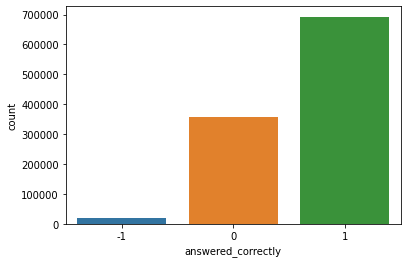

In [ ]:
# Target variable : answered_correctly
# -1은 답변하지 않은 것 0은 오답 1은 정답
sns.countplot(x = sample_train.answered_correctly)
sample_train.answered_correctly.value_counts(normalize=True)

1069559개의 데이터 중 대답하지 못하는 비율은 약 1.9%, 오답 비율은 약 33.3%, 정답 비율은 약 64.7%이다. 학습자들은 절반 이상의 질문에 정답을 선택했다.

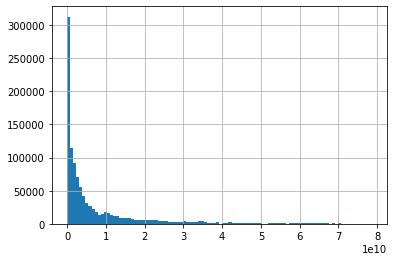

In [ ]:
# timestamp
sample_train.timestamp.hist(bins=100)


- 모든 사용자는 첫 시작부터 기록이 존재하기 때문에 0이 가장 많다.
- timestamp의 단위가 milisecond이기 때문에 이해하기 쉬운 단위로 바꿔주는 게 좋겠다.
- 0은 지운 데이터를 보자

In [ ]:
timestamp = (sample_train.timestamp/(1000*60*60*24))
timestamp = timestamp.drop(0.000000)
timestamp

1          0.000276
2          0.000542
3          0.000749
4          0.001308
5          0.002122
             ...   
1069554    0.010251
1069555    0.013953
1069556    0.013953
1069557    0.013953
1069558    0.013953
Name: timestamp, Length: 1069558, dtype: float64

Min: 0.0 Max: 909.025080925926


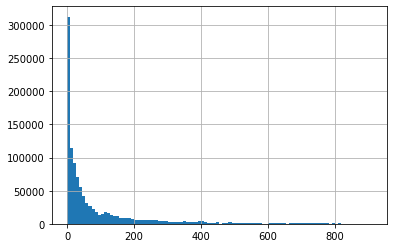

In [ ]:
print('Min:',timestamp.min(), 'Max:',timestamp.max())
timestamp.hist(bins=100)

- 0을 지웠을 때도 역시 앞 쪽에 가장 많은 데이터가 집중되어 있다. 
- 약 100일 정도가 지났을 때 급격히 떨어지고 400일이 넘게 학습한 데이터는 전체에서 많은 부분을 차지하지 않는다.

In [ ]:
sample_train.timestamp = sample_train.timestamp/(1000*60*60) # 밀리세컨에서 일로 변환
sample_train.head(10)

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,624,624,0.00000,13134,3926,False,0,3,1,nan,NaN
1,625,625,0.00662,13134,564,False,1,1,0,22000.00000,False
2,626,626,0.01301,13134,3865,False,2,1,0,18000.00000,False
3,627,627,0.01799,13134,4231,False,3,1,1,19000.00000,False
4,628,628,0.03139,13134,3684,False,4,1,1,13000.00000,False
5,629,629,0.05094,13134,3988,False,5,1,0,43000.00000,False
6,630,630,0.06062,13134,3968,False,6,3,0,65000.00000,False
7,631,631,0.08273,13134,5219,False,7,0,1,31000.00000,False
8,632,632,0.09092,13134,4447,False,8,1,1,5000.00000,True
9,633,633,0.10199,13134,6114,False,9,3,0,17000.00000,True


In [ ]:
# user_id로 그룹화해서 timestamp보기
user_timestamp = sample_train.pivot_table(values='timestamp', index='user_id', aggfunc=['count','max'])
user_timestamp.columns = ['count','max']

Max:12304, Min: 7


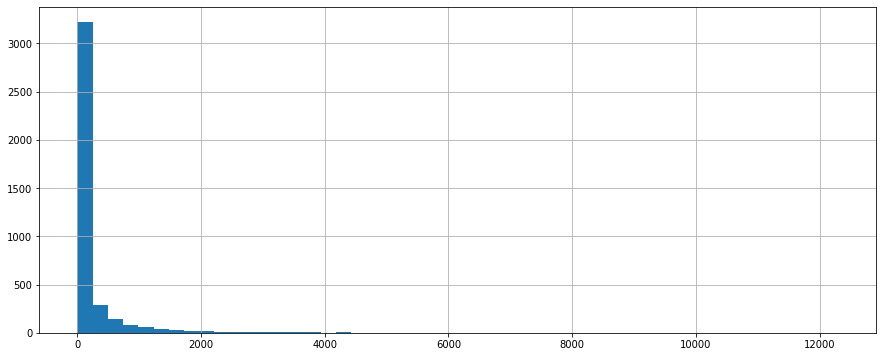

In [ ]:
# histogram
fig = plt.figure(figsize=(15,6))
user_timestamp['count'].hist(bins=50)
fig.show()

# min, max of timestamp count
max = user_timestamp['count'].max()
min = user_timestamp['count'].min()
print(f'Max:{max}, Min: {min}')

267.38975
745


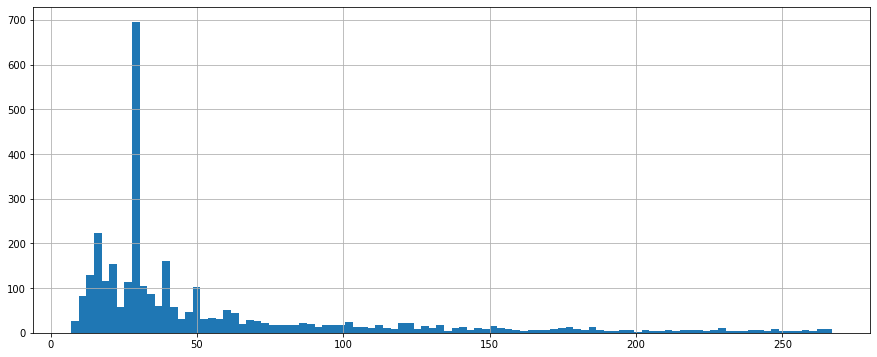

In [ ]:
# histogram 
# medeian보다 작은 수(1863개)
print(user_timestamp['count'].mean())
print(len(user_timestamp.loc[user_timestamp['count'] >= user_timestamp['count'].mean(), 'count']))
fig = plt.figure(figsize=(15,6))
user_timestamp.loc[user_timestamp['count'] <= user_timestamp['count'].mean(), 'count'].hist(bins=100)
fig.show()


In [ ]:
um = sample_train.groupby('user_id')['answered_correctly'].agg('mean')
cnt = user_timestamp['count']
a = pd.concat([um, cnt],axis=1)
a.head()

,answered_correctly,count
user_id,,
13134,0.69680,1250
107002,0.79063,1963
128919,0.33333,30
384661,0.24528,53
1526071,0.50000,30


In [ ]:
most_active_user = user_timestamp['count'].sort_values(ascending=False).head(50)

In [ ]:
most_active_user = most_active_user.reset_index()
most_active_user

,user_id,count
0,1686819041,12304
1,1651010857,11079
2,112539933,10952
3,1860832105,10014
4,1291056519,9886
5,945517326,8552
6,2106150194,7771
7,857625949,7687
8,236398508,7558
9,912999571,7515


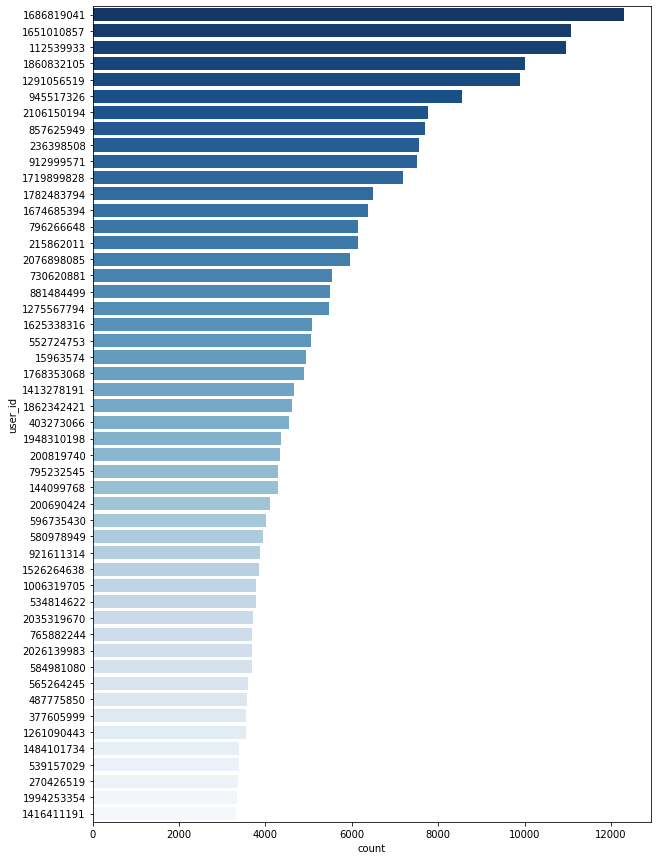

In [ ]:
fig = plt.figure(figsize = (10,15))
sns.barplot(data=most_active_user, 
            x='count', y='user_id', 
            orient ='h', 
            order=most_active_user.user_id, 
            palette = 'Blues_r')
fig.show()

1. user_id로 그룹해서 해서 본 timestamp의 수
- 타임스탬프 수 최소는 7 최대는 12304번
- 히스토그램을 보면 상당수가 0에 가까움
- 전체 4000명 중 중위값보다 적게 들어온 학생의 수는 1864
- 전체 4000명 중 평균(267)보다 많이 들어온 학생 수는 745

> active_users의 기준이 될 수 있을까?  
active_users와 answered_correctly의 상관관계는?

In [ ]:
max_timestamp = user_timestamp['max'].sort_values(ascending=False)

In [ ]:
pd.options.display.float_format = '{:.5f}'.format
max_timestamp.describe()

count          4000.00000
mean     5187405873.41200
std     10590173863.71894
min           58207.00000
25%         1137716.00000
50%       348216550.50000
75%      4751560401.75000
max     78539766992.00000
Name: max, dtype: float64

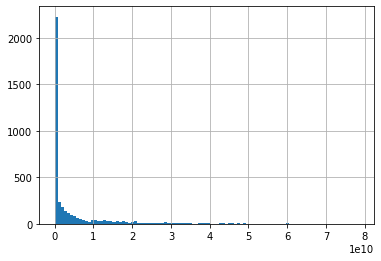

In [ ]:
max_timestamp.hist(bins=100)

In [ ]:
mean, min, median, max = max_timestamp.describe()[['mean', 'min', '50%', 'max']]

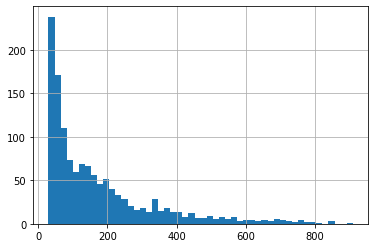

In [ ]:
max_timestamp[max_timestamp>=30].hist(bins=50) 

In [ ]:
len(max_timestamp[max_timestamp>=30])

1316

2. max timestamp
- max 역시 0에 가깝다
- 절반 이상이 4일이 지나면 더 들어오지 않는다 -> 학습 효과가 좋지 않을 것
- 산타토익을 20시간 이용시 124점이 오른다고 하지만 유료 이용권 구매의 최소단위가 30일이기 때문에 max가 30일 이상인 경우에 학습효과가 있다고 보자(그러면 4000명 중 1316명)

### feature engineering : timestamp
1) count가 평균 이상인 학생. -> 이것도 이상하게 나옴  
2) max가 30이상인 타임스탬프-> 이건 이상하게 나옴  

다시 시도  
3) 타임스탬프를 5개로 나눠서 보았음 -> 5개 구간에 차이가 있음  
4) 카운트도 5개로 나눠서 볼까? -> 의미있음!!

#### 이상한 거

In [ ]:
idx_count_user = user_timestamp.loc[user_timestamp['count'] <= user_timestamp['count'].mean(), 'count'].index

In [ ]:
sample_train['count>mean'] = sample_train.user_id.isin(idx_count_user)

In [ ]:
bins = [-1, 30, 56, 119, 227, 910]
sample_train['timestamp_bins']=pd.cut(sample_train['timestamp'], bins=bins, labels=[0,1,2,3,4])

In [ ]:
sample_train.timestamp_bins.unique()

[0, 2, 3, 1, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

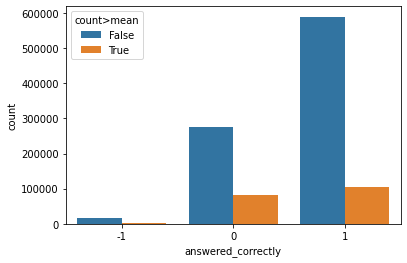

In [ ]:
sns.countplot(data=sample_train, x='answered_correctly', hue='count>mean')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


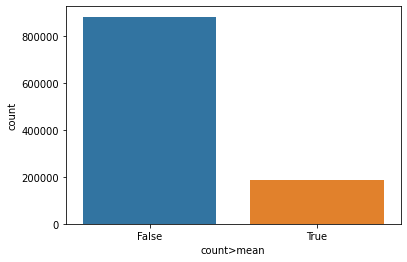

In [ ]:
sns.countplot(sample_train['count>mean'])

#### 다시 한 거

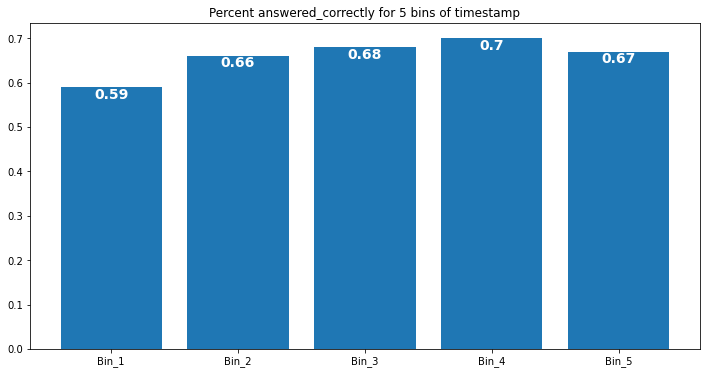

In [ ]:
bin_labels_5 = ['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5']
sample_train['ts_bin'] = pd.qcut(sample_train['timestamp'], q=5, labels=bin_labels_5)

#make function that can also be used for other fields
def correct(field):
    correct = sample_train[sample_train.answered_correctly != -1].groupby([field, 'answered_correctly'], as_index=False).size()
    correct = correct.pivot(index= field, columns='answered_correctly', values='size')
    correct['Percent_correct'] = round(correct.iloc[:,1]/(correct.iloc[:,0] + correct.iloc[:,1]),2)
    correct = correct.sort_values(by = "Percent_correct", ascending = False)
    correct = correct.iloc[:,2]
    return(correct)

bins_correct = correct("ts_bin")
bins_correct = bins_correct.sort_index()
bins_correct

fig = plt.figure(figsize=(12,6))
plt.bar(bins_correct.index, bins_correct.values)
for i, v in zip(bins_correct.index, bins_correct.values):
    plt.text(i, v, v, color='white', fontweight='bold', fontsize=14, va='top', ha='center')
plt.title("Percent answered_correctly for 5 bins of timestamp")
plt.xticks(rotation=0)
plt.show()

In [ ]:
freq_labels_5 = ['freq_1', 'freq_2', 'freq_3', 'freq_4', 'freq_5']
freq_user = pd.qcut(user_timestamp['count'].sort_values(), q=5, labels=freq_labels_5).reset_index()

In [ ]:
freq1_user = freq_user[freq_user['count'] == 'freq_1'].user_id
freq2_user = freq_user[freq_user['count'] == 'freq_2'].user_id
freq3_user = freq_user[freq_user['count'] == 'freq_3'].user_id
freq4_user = freq_user[freq_user['count'] == 'freq_4'].user_id
freq5_user = freq_user[freq_user['count'] == 'freq_5'].user_id

In [ ]:
sample_train['user_freq'] = sample_train.user_id
if sample_train['user_id'].isin(freq1_user).any() :
    sample_train.loc[sample_train[sample_train['user_id'].isin(freq1_user)].index, ['user_freq']] = 'freq_1'

In [ ]:
if sample_train['user_id'].isin(freq2_user).any() :
    sample_train.loc[sample_train[sample_train['user_id'].isin(freq2_user)].index, ['user_freq']] = 'freq_2'
if sample_train['user_id'].isin(freq3_user).any() :
    sample_train.loc[sample_train[sample_train['user_id'].isin(freq3_user)].index, ['user_freq']] = 'freq_3'
if sample_train['user_id'].isin(freq4_user).any() :
    sample_train.loc[sample_train[sample_train['user_id'].isin(freq4_user)].index, ['user_freq']] = 'freq_4'
if sample_train['user_id'].isin(freq5_user).any() :
    sample_train.loc[sample_train[sample_train['user_id'].isin(freq5_user)].index, ['user_freq']] = 'freq_5'

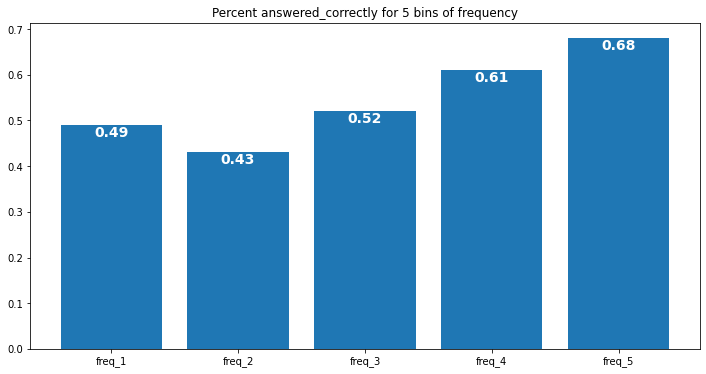

In [ ]:
freq_correct = correct("user_freq")
freq_correct = freq_correct.sort_index()
freq_correct

fig = plt.figure(figsize=(12,6))
plt.bar(freq_correct.index, freq_correct.values)
for i, v in zip(freq_correct.index, freq_correct.values):
    plt.text(i, v, v, color='white', fontweight='bold', fontsize=14, va='top', ha='center')
plt.title("Percent answered_correctly for 5 bins of frequency")
plt.xticks(rotation=0)
plt.show()

1. timestamp를 5단계로 나눴을 때 시간이 오래될수록 정답률이 올라가는 경향을 보이지만 마지막 구간에서는 정답률이 줄어들었다. 왤까? 너무 오랜만에 들어와서 그런가? 
2. timestamp의 수는 학생이 얼마나 자주 이용하였는가를 보여준다. 첫번째 구간은 가장 적게 이용하는 학생들이지만 두번째 구간보다 높다. 아마 잘하는 학생들이 그냥 맛보기로 한 경우가 많지 않을까?(나의 경험) 두번째 구간부터는 정답률이 올라간다. 즉, 자주 사용할수록 정답률이 올라간다는 것.
3. 문제 : 그래서 이것을 어떻게 정오답 예측에 이용할 것인가? 특히 두번째는 약간 애매한데 위에서 사용한 것보다 더 간단하게 freq를 적용할 수 있는 방법을 찾아봐야겠다.

In [ ]:
# data 정리
# sample_train = sample_train.drop(['Unnamed: 0', 'count>mean', 'timestamp_bins'], axis=1)
sample_train.head()

,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,count>mean,ts_bin,user_freq
0,624,624,0.000000,13134,3926,False,0,3,1,NaN,NaN,False,Bin_1,freq_5
1,625,625,0.000276,13134,564,False,1,1,0,22000.0,False,False,Bin_1,freq_5
2,626,626,0.000542,13134,3865,False,2,1,0,18000.0,False,False,Bin_1,freq_5
3,627,627,0.000749,13134,4231,False,3,1,1,19000.0,False,False,Bin_1,freq_5
4,628,628,0.001308,13134,3684,False,4,1,1,13000.0,False,False,Bin_1,freq_5


### content

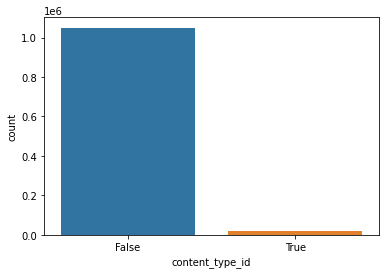

In [ ]:
# content_type_id

sample_train.content_type_id.value_counts(normalize=True)
#false = question
#true = lecture

sns.countplot(data=sample_train, x='content_type_id') 
# 98%가 question, 2%가 lecture



In [ ]:
# lecture인 것은 지우자
idx = sample_train[sample_train.content_type_id == True].index
sample_train = sample_train.drop(idx).reset_index(drop=True)
len(sample_train[sample_train.content_type_id == True])

0

In [ ]:
# task_container_id
sample_train.task_container_id.unique() # task_container_id는 총 만개(다 question)
sample_train.task_container_id.value_counts() 


14      8208
15      8139
4       7083
5       7045
6       7032
        ... 
9185       1
9853       1
9646       1
9645       1
9719       1
Name: task_container_id, Length: 10000, dtype: int64

In [ ]:
sample_train.task_container_id.value_counts().describe()

# 제일 많이 푼 taks container는 8208번 50%는 13번 
# 많이 푼 문제는 좀 쉬운 문제일까?

count    10000.000000
mean       104.919600
std        335.093642
min          1.000000
25%          4.000000
50%         13.000000
75%         61.000000
max       8208.000000
Name: task_container_id, dtype: float64

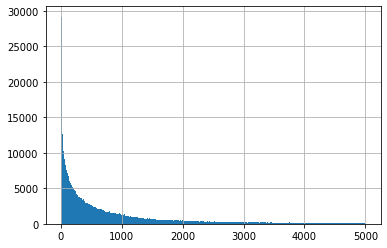

In [ ]:
sample_train.loc[(sample_train.task_container_id >=0) & (sample_train.task_container_id<=5000), 'task_container_id'].hist(bins=1000)
# 숫자 번호가 작을수록 많이 풀었고 클수록 적게 풀었다. 
# 숫자 번호가 작을수록 먼저 제시되는 질문일 확률이 높겠다.

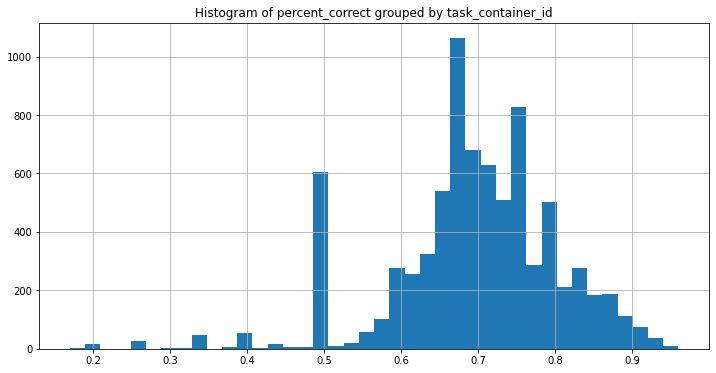

In [ ]:
task_id_correct = correct("task_container_id")

fig = plt.figure(figsize=(12,6))
task_id_correct.hist(bins=40)
plt.title("Histogram of percent_correct grouped by task_container_id")
plt.xticks(rotation=0)
plt.show()

task_container_id의 히스토그램을 보면 정답률이 0.5부터 0.9 사이에 밀집되어 있어 정답률이 0.5 미만인 건 너무 어려운 거라고 보면 되려나

In [ ]:
# content_id별 정답률
content_id_agg = sample_train[sample_train.answered_correctly!=-1].groupby('content_id')['answered_correctly'].agg(['count', 'sum'])
content_id_agg['correct_rate'] = content_id_agg['sum']/content_id_agg['count']
content_id_agg.sort_values(by='count', ascending=False)

,count,sum,correct_rate
content_id,,,
6116,2225,614,0.275955
6173,2079,595,0.286195
4120,2044,534,0.261252
175,2006,715,0.356431
7876,1956,812,0.415133
...,...,...,...
12806,1,1,1.000000
12807,1,1,1.000000
12813,1,1,1.000000


In [ ]:
(content_id_agg['correct_rate']==0).sum() #161개
(content_id_agg['correct_rate']==1).sum() #1043개

1043

### 유저 별 인터렉션의 정답률 

In [ ]:
sample_train['lag'] = sample_train.groupby('user_id')['answered_correctly'].shift()
sample_train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,user_correctness,lag
0,624,0,13134,3926,False,0,3,1,nan,NaN,nan,nan
1,625,23840,13134,564,False,1,1,0,22000.00000,False,1.00000,1.00000
2,626,46834,13134,3865,False,2,1,0,18000.00000,False,0.50000,0.00000
3,627,64749,13134,4231,False,3,1,1,19000.00000,False,0.33333,0.00000
4,628,113000,13134,3684,False,4,1,1,13000.00000,False,0.50000,1.00000


In [ ]:
sample_train['shift'] = sample_train['timestamp'].shift(1)
sample_train['diff'] = sample_train['timestamp'] - sample_train['shift']
sample_train.loc[sample_train['diff']<0, 'diff']=0

In [ ]:
cum = sample_train.groupby('user_id')['lag'].agg(['cumsum', 'cumcount'])
sample_train['user_correctness'] = cum['cumsum'] / cum['cumcount']
sample_train.drop(columns=['lag'], inplace=True)

In [ ]:
sample_train[['diff', 'user_correctness']] = sample_train[['diff', 'user_correctness']].fillna(0)

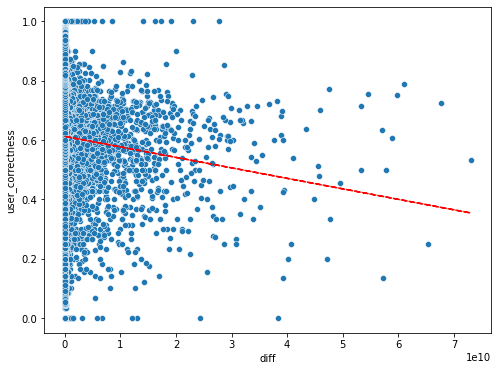

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(data=sample_train, x='diff', y='user_correctness')
x = sample_train['diff']
y = sample_train.user_correctness
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

In [ ]:
sample_train.drop(columns=['Unnamed: 0'], inplace=True)

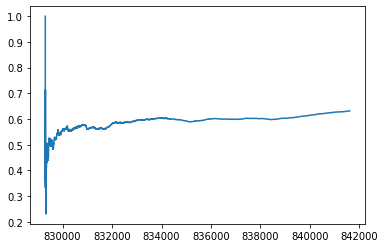

In [ ]:
m_u = sample_train.user_id.mode()[0]
sample_train.loc[sample_train.user_id==m_u, 'user_correctness'].plot.line()


In [ ]:
 sample_train.prior_question_elapsed_time = sample_train.prior_question_elapsed_time.fillna(0)

In [ ]:
sample_train['this_q_elapsed_time']=sample_train.prior_question_elapsed_time.shift(-1)

In [ ]:
content_time = sample_train[['content_id', 'answered_correctly','this_q_elapsed_time']]
content_time = content_time.groupby('content_id').agg(['mean'])

In [ ]:
content_time.columns = ['mean_correct', 'mean_time']
content_time

,mean_correct,mean_time
content_id,,
0,0.902778,19388.888889
1,0.860465,18674.418605
2,0.569328,24424.369748
3,0.783784,20945.945946
4,0.608563,22003.058104
...,...,...
13518,0.555556,8000.000000
13519,0.750000,36875.000000
13520,0.777778,42111.111111


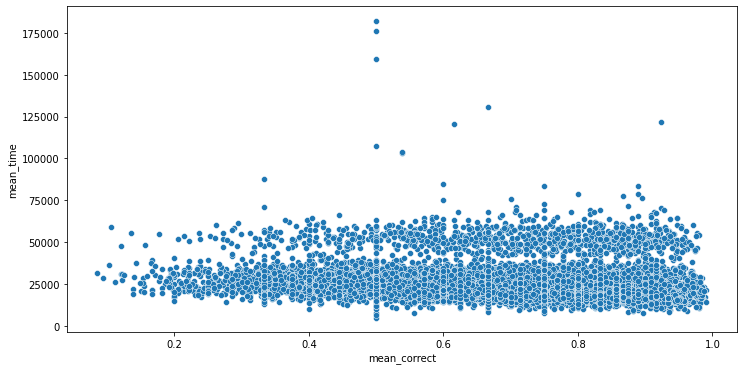

In [ ]:
# 평균 정답율과 이 문제를 푸는데 들인 평균 시간이 있어. 이 둘은 상관관계가 있을까?
# 시간이 적게 걸린 건 빨리 풀고 정답율이 높고 아닌 것은 정답율이 낮고?
# 하지만 산점도를 보면 별로 큰 상관성이 안 보인다.
# elapsed time은 어떻게 활용할 수 있지?

content_time = content_time[(content_time.mean_correct>0) & (content_time.mean_correct<1)]

fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='mean_correct', y='mean_time', data=content_time)
# x = content_time.mean_time
# y = content_time.mean_correct
# z = np.polyfit(x, y, 1)
# p = np.poly1d(z)
# plt.plot(x,p(x),"r--")
plt.show()

---

In [ ]:
user_percent = sample_train[sample_train.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Mean='mean', Answers='count')
user_percent

,Mean,Answers
user_id,,
13134,0.70636,1243
107002,0.82313,1928
128919,0.33333,30
384661,0.26923,52
1526071,0.50000,30
...,...,...
2143839785,0.65833,120
2143906764,0.63333,90
2145586557,0.15385,13


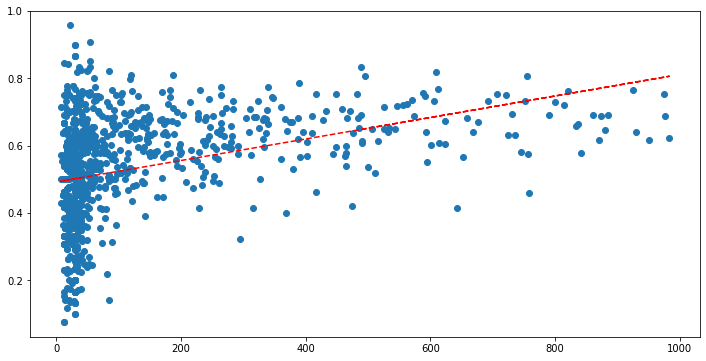

In [ ]:


user_percent = user_percent.query('Answers <= 1000').sample(n=1000, random_state=1)

fig = plt.figure(figsize=(12,6))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker='o')
# plt.title("Percent answered correctly versus number of questions answered User")
# plt.xticks(rotation=0)
# plt.xlabel("Number of questions answered")
# plt.ylabel("Percent answered correctly")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

많이 답할수록 정답율이 올라가는 추세 = 많이 사용할수록 정답율이 올라감  
누적사용횟수를 새로운 변수로 만들 수 있음

In [ ]:
content_percent = sample_train[sample_train.answered_correctly != -1].groupby('content_id')['answered_correctly'].agg(Mean='mean', Answers='count')
content_percent.query('Answers <= 25000')

,Mean,Answers
content_id,,
0,0.90278,72
1,0.86047,86
2,0.56933,476
3,0.78378,259
4,0.60856,327
...,...,...
13518,0.55556,9
13519,0.75000,8
13520,0.77778,9


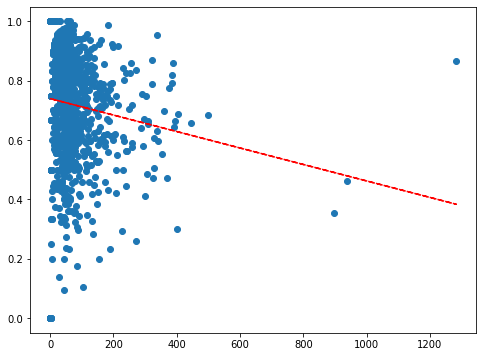

In [ ]:
content_percent = content_percent.query('Answers <= 25000').sample(n=1000, random_state=1)

fig = plt.figure(figsize=(12,6))
x = content_percent.Answers
y = content_percent.Mean
plt.scatter(x, y, marker='o')
# plt.title("Percent answered correctly versus number of questions answered Content_id")
# plt.xticks(rotation=0)
# plt.xlabel("Number of questions answered")
# plt.ylabel("Percent answered correctly")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

적은 사람이 답한 문제는 정답율이 높고 그렇지 않으면 정답율이 떨어짐. 
하지만 1번 풀고 1번 맞춘 그런 문제가 있음. 별로 의미있는 그래프는 아닌 것 같음

True     953469
False     91737
Name: prior_question_had_explanation, dtype: int64

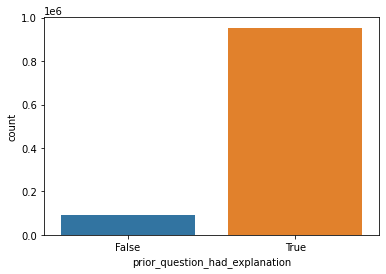

In [ ]:
sns.countplot(x=sample_train.prior_question_had_explanation)
sample_train.prior_question_had_explanation.value_counts()

In [ ]:
explanation_percent = sample_train[sample_train.answered_correctly != -1].groupby('prior_question_had_explanation')['answered_correctly'].agg(Mean='mean', Answers='count')
explanation_percent

,Mean,Answers
prior_question_had_explanation,,
False,0.494773,91737
True,0.675741,953469


prior_question_had_explanation
False     91737
True     953469
NaN        3990
Name: (answered_correctly, count), dtype: int64


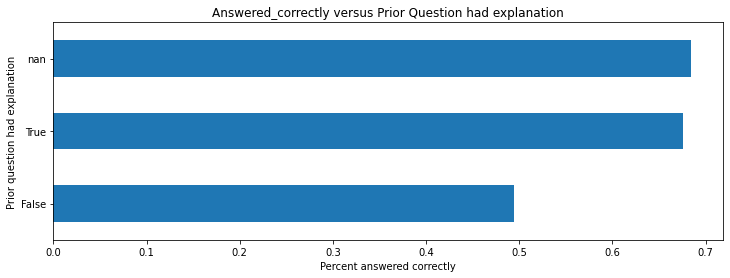

In [ ]:
pq = sample_train[sample_train.answered_correctly != -1].groupby(['prior_question_had_explanation'], dropna=False).agg({'answered_correctly': ['mean', 'count']})
#pq.index = pq.index.astype(str)
print(pq.iloc[:,1])
pq = pq.iloc[:,0]

fig = plt.figure(figsize=(12,4))
pq.plot.barh()
# for i, v in zip(pq.index, pq.values):
#     plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Answered_correctly versus Prior Question had explanation")
plt.xlabel("Percent answered correctly")
plt.ylabel("Prior question had explanation")
plt.xticks(rotation=0)
plt.show()

explanation을 보면 정답율이 올라감

---
### questions

In [ ]:
questions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/riiid/riiid-test-answer-prediction.zip (Unzipped Files)/questions.csv')

In [ ]:
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [ ]:
questions.shape

(13523, 5)

In [ ]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [ ]:
questions[questions.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


questions의 tag별로 데이터 정리

In [ ]:
questions['tags'] = questions['tags'].astype(str)

tags = [x.split() for x in questions[questions.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)
print(f'There are {len(tags)} different tags')

There are 188 different tags


In [ ]:
# tags_list = [x.split() for x in questions.tags.values]
# questions['tags'] = tags_list
# questions.head()

tmp = sample_train[sample_train.answered_correctly != -1].groupby(["content_id", 'answered_correctly'], as_index=False).size()
tmp = tmp.pivot(index= "content_id", columns='answered_correctly', values='size')

tmp.columns = ['Wrong', 'Right']
tmp = tmp.fillna(0)
tmp[['Wrong', 'Right']] = tmp[['Wrong', 'Right']].astype(int)
questions = questions.merge(tmp, left_on = "question_id", right_on = "content_id", how = "left")
questions.head()

,question_id,bundle_id,correct_answer,part,tags,Wrong,Right
0,0,0,0,1,51 131 162 38,7.00000,65.00000
1,1,1,1,1,131 36 81,12.00000,74.00000
2,2,2,0,1,131 101 162 92,205.00000,271.00000
3,3,3,0,1,131 149 162 29,56.00000,203.00000
4,4,4,3,1,131 5 162 38,128.00000,199.00000


In [ ]:
tags_df = pd.DataFrame()
for x in range(len(tags)):
    df = questions[questions.tags.apply(lambda l: tags[x] in l)]
    df1 = df.agg({'Wrong': ['sum'], 'Right': ['sum']})
    df1['Total_questions'] = df1.Wrong + df1.Right
    df1['Question_ids_with_tag'] = len(df)
    df1['tag'] = tags[x]
    df1 = df1.set_index('tag')
    tags_df = tags_df.append(df1)

tags_df[['Wrong', 'Right', 'Total_questions']] = tags_df[['Wrong', 'Right', 'Total_questions']].astype(int)
tags_df['Percent_correct'] = tags_df.Right/tags_df.Total_questions
tags_df = tags_df.sort_values(by = "Percent_correct")


In [ ]:
tags_df.head()

,Wrong,Right,Total_questions,Question_ids_with_tag,Percent_correct
tag,,,,,
86,22,14,36,1,0.388889
24,1663,1093,2756,17,0.396589
23,2731,2168,4899,11,0.442539
19,1921,1590,3511,57,0.452862
151,2882,2752,5634,16,0.488463


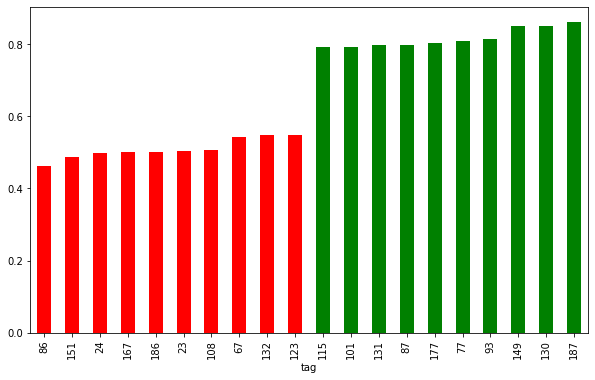

In [ ]:
select_rows = list(range(0,10)) + list(range(178, len(tags_df)))
tags_select = tags_df.iloc[select_rows,4]

fig = plt.figure(figsize=(10,6))
x = tags_select.index
y = tags_select.values
clrs = ['red' if y < 0.6 else 'green' for y in tags_select.values]
tags_select.plot.bar(x, y, color=clrs)
# plt.title("Ten hardest and ten easiest tags")
# plt.xlabel("Tag")
# plt.ylabel("Percent answers correct of questions with the tag")
# plt.xticks(rotation=90)
plt.show()

쉬운 문제와 어려운 문제를 나눌 수 있음 차이가 많이 남

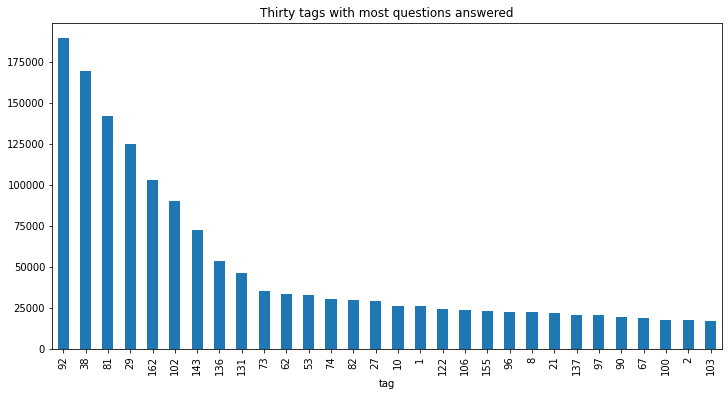

In [ ]:
tags_select = tags_df.sort_values(by = "Total_questions", ascending = False).iloc[:30,:]
tags_select = tags_select["Total_questions"]

fig = plt.figure(figsize=(12,6))
ax = tags_select.plot.bar()
plt.title("Thirty tags with most questions answered")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
# ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
plt.show()

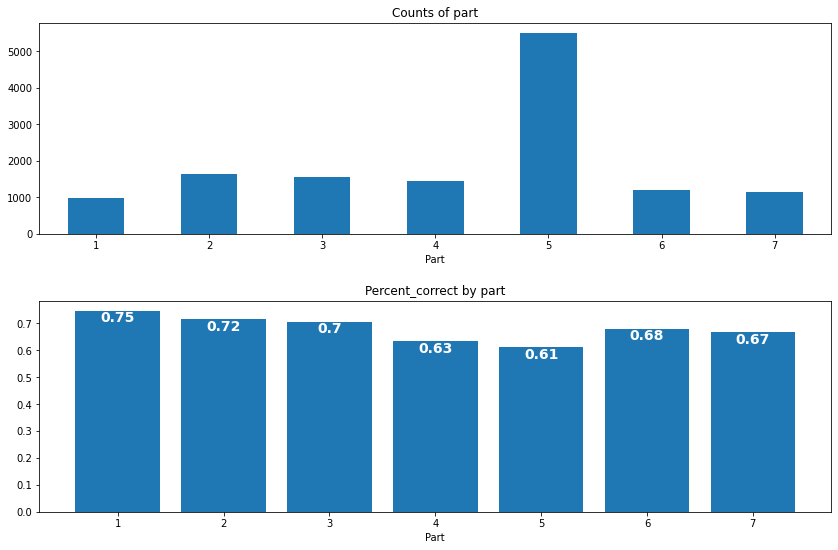

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax1 = questions.groupby("part").count()['question_id'].plot.bar()
plt.title("Counts of part")
plt.xlabel("Part")
plt.xticks(rotation=0)

part = questions.groupby('part').agg({'Wrong': ['sum'], 'Right': ['sum']})
part['Percent_correct'] = part.Right/(part.Right + part.Wrong)
part = part.iloc[:,2]

ax2 = fig.add_subplot(212)
plt.bar(part.index, part.values)
for i, v in zip(part.index, part.values):
    plt.text(i, v, round(v,2), color='white', fontweight='bold', fontsize=14, va='top', ha='center')

plt.title("Percent_correct by part")
plt.xlabel("Part")
plt.xticks(rotation=0)
plt.tight_layout(pad=2)
plt.show()

파트 5 문제가 가장 많고 정답율이 가장 낮다. 파트 1은 문제가 가장 적고 정답율이 높다. 그러면 나온 문제가 파트 1이면 정답을 맞출 확률이 높을 거라고 생각?

---
### Lectures

In [ ]:
lectures=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/riiid/riiid-test-answer-prediction.zip (Unzipped Files)/lectures.csv')

In [ ]:
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [ ]:
lectures.shape

(418, 4)

In [ ]:
lect_type_of = lectures.type_of.value_counts()
lect_type_of

concept             222
solving question    186
intention             7
starter               3
Name: type_of, dtype: int64

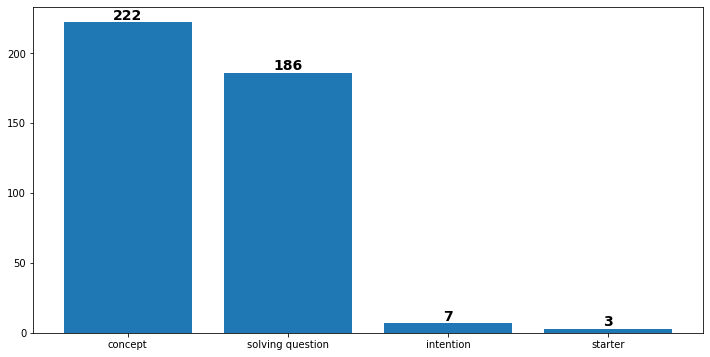

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.bar(lect_type_of.index, lect_type_of.values)
for i, v in zip(lect_type_of.index, lect_type_of.values):
    plt.text(i, v, v, color='black', fontweight='bold', fontsize=14, va='bottom', ha='center')

sample_train.answered_correctly 이게 -1일 경우 lecture로 볼 수 있는데 나는 그걸 다 지워버렸다.. 일단 lecture는 여기까지만 하자

하지만 강의를 봤는지 여부가 feature가 될 수 있다.

In [ ]:
sample_train.answered_correctly.value_counts()

1    692418
0    356778
Name: answered_correctly, dtype: int64

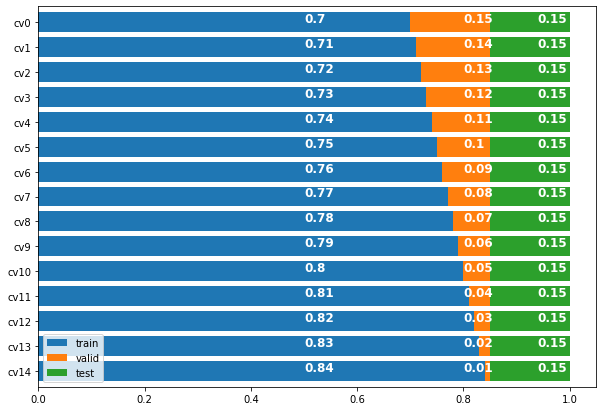

In [ ]:
# train/valid/test set visualization

train = np.arange(0.70, 0.84, 0.01)
valid = 0.85-train

cv_set = pd.DataFrame({'train':train, 'valid':valid})
idx = []
for i in range(15) :
    idx.append(f'cv{i}')
cv_set.index=idx;
cv_set['test'] = [0.15]*len(cv_set)

cv_set.sort_values(by='valid').plot(kind='barh', figsize=(10,7), stacked=True, width=0.8)
font2 = {'family': 'Times New Roman',
      'color':  'white',
      'weight': 'bold',
      'size': 12}
i=0
for item in cv_set.sort_values(by='valid').index :
    txt_t = round(cv_set.sort_values(by='valid').loc[item, 'train'],2)
    txt_v = round(cv_set.sort_values(by='valid').loc[item, 'valid'],2)
    txt_te=cv_set.sort_values(by='valid').loc[item, 'test']

    plt.text(0.5, i, txt_t, fontdict=font2)
    plt.text(0.8, i, txt_v, fontdict=font2)
    plt.text(0.94, i, txt_te, fontdict=font2)
    i+=1
plt.legend(loc='lower left')
plt.show()

In [ ]:
!pip freeze > requirements.txt